In [199]:
import os
import numpy as np
import cv2
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy import misc
from PIL import Image
from collections import defaultdict
import operator
import seaborn as sns
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

In [151]:
path_foliage = r"C:\Users\J\Desktop\수업\의료지능기계학습\assingment2\Foliage"
path_manmade = r"C:\Users\J\Desktop\수업\의료지능기계학습\assingment2\ManMade"

In [152]:
def makeGaussian(size, sigma = 3, center=None):
    """ Make a square gaussian kernel.
    """

    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / (2*sigma)**2)
gaussian = makeGaussian(size=512, sigma = 64, center=(256,256))

# Fourier spectra
 - def getSpectra(dirname)

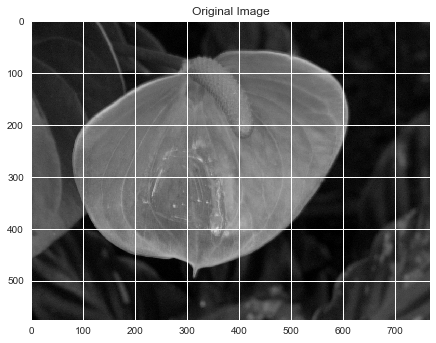

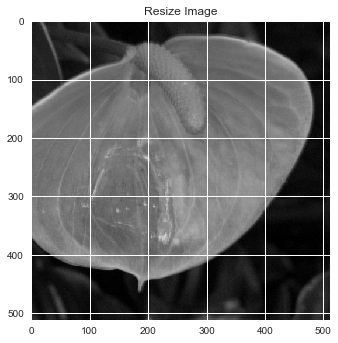

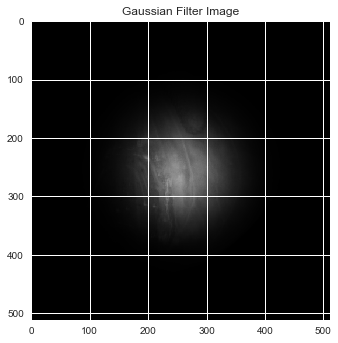

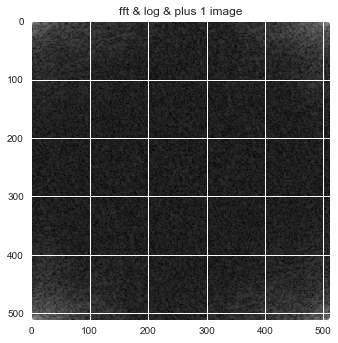

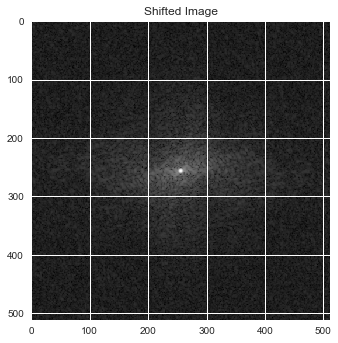

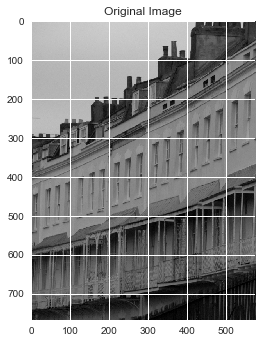

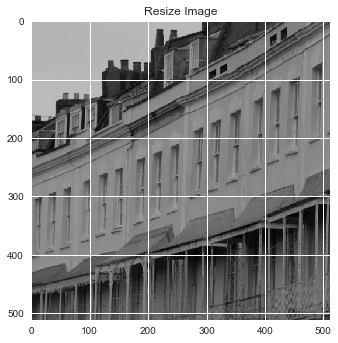

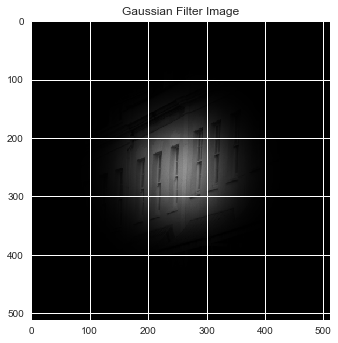

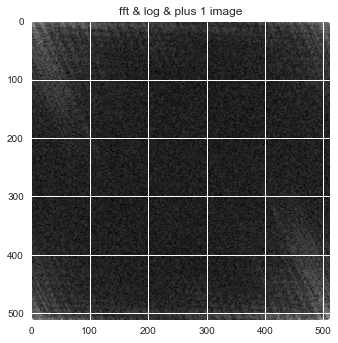

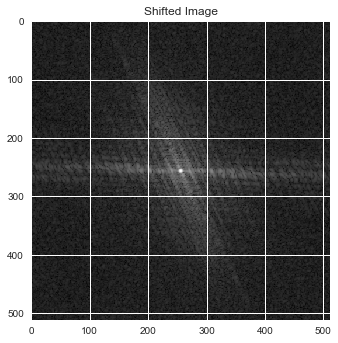

In [153]:
show_para = 1 #for showing only one sample
def getSpectra(dirname):
    '''
    Resize the image, take the middle 512*512 pixels of this image
    '''
    new_width = 512
    new_height = 512
    count = 0
    
    file_list = os.listdir(dirname)
    # Read in all tif-images in this directory
    
    all_array = []
    for file in file_list:
        path = dirname+"\\"+file
        count += 1
        im = Image.open(path).convert('I')
        
        #1
        if count == show_para:
            plt.title("Original Image")
            plt.imshow(im)
            plt.show()
        width, height = im.size
    
        # take the middle 512x512 pixels of this image
        left = (width - new_width)/2
        top = (height - new_height)/2
        right = (width + new_width)/2
        bottom = (height + new_height)/2
        im = im.crop((left, top, right, bottom))
        #2
        if count <= show_para:
            plt.title("Resize Image")
            plt.imshow(im)
            plt.show()

        im_array = np.array(im)
        # window each image by a Gaussian of sigma 64 pixels
#         im = gaussian_filter(im, sigma=64)
        for i, row in enumerate(im_array):
            for j, col in enumerate(row):
                im_array[i][j] = col*gaussian[i][j]
        im_array = Image.fromarray(np.array(im_array))
        
        #3
        if count <= show_para:
            plt.title("Gaussian Filter Image")
            plt.imshow(im_array)
            plt.show()
        
        # Fourier Image -> 1+ result -> log(1+ result)
        
#         #4
#         if count <= show_para:
#             plt.title("Fourier Image")
#             plt.imshow(im_array)
#             plt.show()
        fft2im_array = np.abs(np.fft.fft2(np.array(im_array)))

        one_array = np.ones(fft2im_array.shape)
        fft2im_array = np.add(fft2im_array, one_array)
        fft2im_array = np.log(fft2im_array)
        fft2im_array = np.square(fft2im_array)
        
        #5
        if count <= show_para:
            plt.title("fft & log & plus 1 image")
            plt.imshow(fft2im_array, plt.cm.gray)
            plt.show()

        freqs = np.fft.fftshift(fft2im_array)

        #6
        if count <= show_para:
            plt.title("Shifted Image")
            plt.imshow(freqs, plt.cm.gray)
            plt.show()

        all_array.append(freqs)
    return all_array

Foliage_array = getSpectra(path_foliage)
ManMade_array = getSpectra(path_manmade)

# Radial Fourier spectra
 - def radialAverage(array)

In [154]:
Foliage_array[0:1]

[array([[ 31.00646051,  30.59333706,  26.07138893, ...,  23.81586685,
          26.07138893,  30.59333706],
        [ 29.89615334,  27.6136413 ,  18.53539926, ...,  19.69221699,
          28.0947514 ,  30.1629363 ],
        [ 26.94198119,  24.84359336,  10.4542555 , ...,  16.13769275,
          21.37764427,  24.49020518],
        ..., 
        [ 27.67029104,  25.5824133 ,  18.92101254, ...,  29.79208867,
          22.49580964,  24.82934285],
        [ 26.94198119,  24.49020518,  21.37764427, ...,  31.61420108,
          10.4542555 ,  24.84359336],
        [ 29.89615334,  30.1629363 ,  28.0947514 , ...,  31.38364454,
          18.53539926,  27.6136413 ]])]

In [155]:
ManMade_array[0:1]

[array([[  3.78656631,  15.49983044,  22.14936158, ...,  23.65682166,
          22.14936158,  15.49983044],
        [ 17.45877295,  19.5669996 ,  24.2563309 , ...,  21.6300376 ,
          16.41212991,  20.16751403],
        [ 27.26435596,  22.55255613,  21.22409882, ...,  19.59556886,
          21.46997334,  27.49977227],
        ..., 
        [ 27.4710692 ,  28.21234439,  22.61596907, ...,  24.62370825,
          19.48678614,  21.2194753 ],
        [ 27.26435596,  27.49977227,  21.46997334, ...,  23.58166861,
          21.22409882,  22.55255613],
        [ 17.45877295,  20.16751403,  16.41212991, ...,  25.31240086,
          24.2563309 ,  19.5669996 ]])]

### Test for radialAverage Function

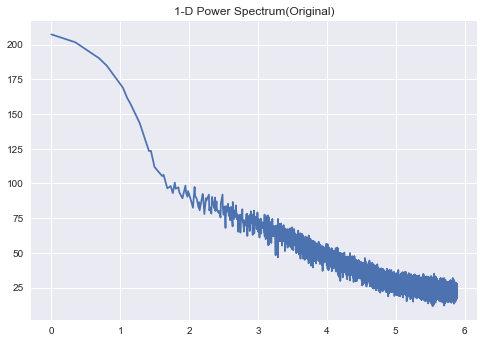

In [157]:
ori_radial_dict = defaultdict(lambda:[])
center = [256,256
         ]
def ori_radialAverage(array):
    global ori_radial_dict
    r_list = []
    avg_list = []
    
    for j, row in enumerate(array):
        for k, val in enumerate(row):
            radial = math.sqrt((center[0]-j)**2 + (center[1]-k)**2)
            ori_radial_dict[radial].append(val)
                
    ori_radial_dict = sorted(ori_radial_dict.items(), key=operator.itemgetter(0))

    for k,i in enumerate(ori_radial_dict):
        if k==0:
            pass
        else:
            r_list.append(math.log(i[0]))
            avg_list.append(sum(i[1])/len(i[1]))

    return r_list, avg_list

ori_rlist, ori_avglist = ori_radialAverage(Foliage_array[0:1])
plt.plot(ori_rlist, ori_avglist)
plt.title("1-D Power Spectrum(Original)")
plt.show()

### Because the end of the graph is <span style="color:red">too vigorous</span>, so we test two situation refine the radial value(int, round)

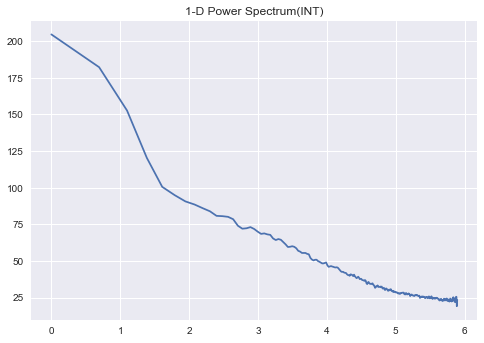

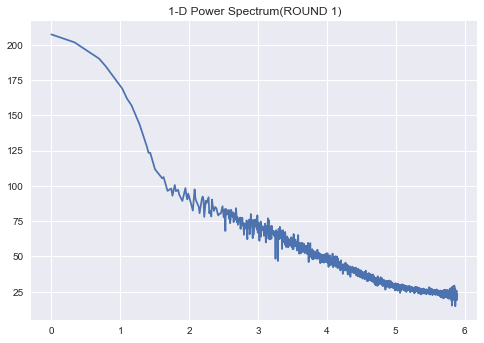

In [158]:
def radialAverage(array):
    radial_dict = defaultdict(lambda:[])
    round_radict = defaultdict(lambda:[])
    center = [256,256]
    r_list = list()
    avg_list = list()
    ro_list = list()
    avgro_list = list()
    
    
    for j, row in enumerate(array):
        for k, val in enumerate(row):
            radial = math.sqrt((center[0]-j)**2 + (center[1]-k)**2)
            radial_dict[int(radial)].append(val)
            round_radict[round(radial, 1)].append(val)
                
    sorted_radial = sorted(radial_dict.items(), key=operator.itemgetter(0))
    sorted_roundradial = sorted(round_radict.items(), key=operator.itemgetter(0))
    
    #spectrum(int)
    for k,i in enumerate(sorted_radial):
        if k==0:
            pass
        else:
            r_list.append(math.log(i[0]))
            avg_list.append(sum(i[1])/len(i[1]))
    #spectrum(round 1)
    for k,i in enumerate(sorted_roundradial):
        if k==0:
            pass
        else:
            ro_list.append(math.log(i[0]))
            avgro_list.append(sum(i[1])/len(i[1]))

    return r_list, avg_list, ro_list, avgro_list

r, avg, ro_list, avgro_list = radialAverage(Foliage_array[0:1])

plt.plot(r, avg)
plt.title("1-D Power Spectrum(INT)")
plt.show()

plt.plot(ro_list, avgro_list)
plt.title("1-D Power Spectrum(ROUND 1)")
plt.show()

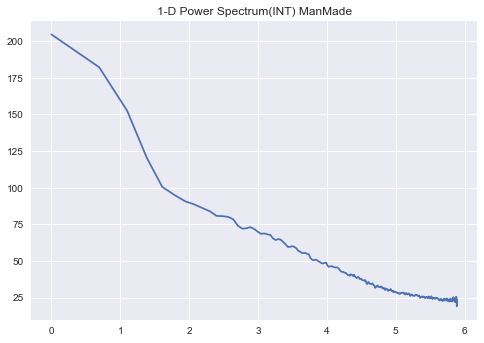

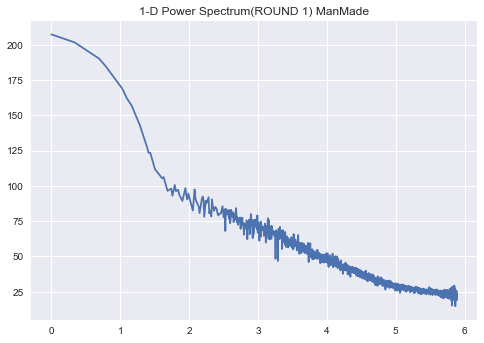

In [159]:
r_m, avg_m, ro_list_m, avgro_list_m = radialAverage(ManMade_array[0:1])
plt.plot(r_m, avg_m)
plt.title("1-D Power Spectrum(INT) ManMade")
plt.show()

plt.plot(ro_list_m, avgro_list_m)
plt.title("1-D Power Spectrum(ROUND 1) ManMade")
plt.show()

# Determining the slope statistics
 - def fit1DSpectrum(array)

In [160]:
def fit1DSpectrum(array):
    
    r_list, avg_list, ro_list, avgro_list = radialAverage(array)
            
    l = dict()
    l['x'] = r_list
    l['y'] = avg_list
    df = pd.DataFrame(l)
    df.head()
    g = sns.lmplot(x = "x", y = "y", data = df, size = 5, ci=None)
    a= np.array(g)
    for ax in g.axes.flat:
        for line in ax.lines:
            slope_int = (line.get_ydata()[-1]-line.get_ydata()[0])/(line.get_xdata()[-1]-line.get_xdata()[0])
    if show_para>0:
        plt.title("Determining the slope statistics(INT)")
        plt.show()
    
    l = dict()
    l['x'] = ro_list
    l['y'] = avgro_list
    df = pd.DataFrame(l)
    df.head()
    g = sns.lmplot(x = "x", y = "y", data = df, size = 5, ci=None)
    a= np.array(g)
    for ax in g.axes.flat:
        for line in ax.lines:
            slope_ro = (line.get_ydata()[-1]-line.get_ydata()[0])/(line.get_xdata()[-1]-line.get_xdata()[0])

    if show_para>0:
        plt.title("Determining the slope statistics(ROUND 1)")
        plt.show()
    return slope_int, slope_ro


## Foliage Array


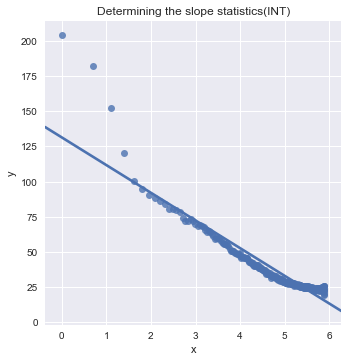

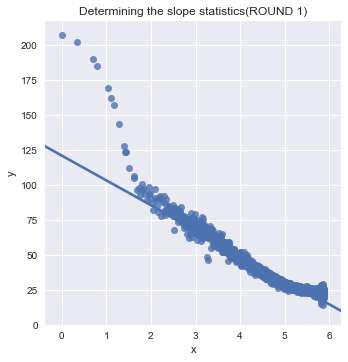

INT: -19.6799499536
ROUND: -17.6819340696


In [161]:
slope_int, slope_ro = fit1DSpectrum(Foliage_array[0:1])
print("INT:", slope_int)
print("ROUND:", slope_ro)

## Manmade Array

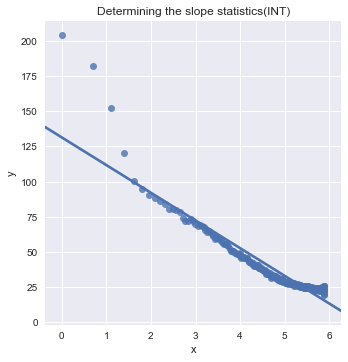

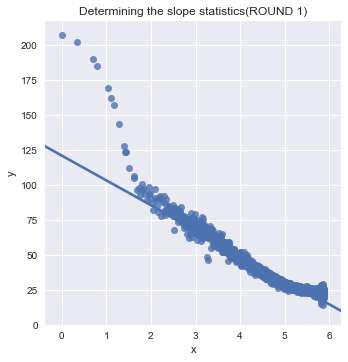

INT: -19.6799499536
ROUND: -17.6819340696


In [162]:
slope_m_int, slope_m_ro = fit1DSpectrum(ManMade_array[0:1])
print("INT:", slope_m_int)
print("ROUND:", slope_m_ro)

# Main Script

In [163]:
#main script
file_foliage = os.listdir(path_foliage)
file_manmade = os.listdir(path_manmade)

#for not showing images
show_para = 0

# We did these upthere
# foliage_specs = getSpectra(path_foliage)
# manmade_specs = getSpectra(path_manmade)

#X = slope, Y = class
X = []
Y = []
#for slope distribution
foliage_slopes = []
manmade_slopes = []

# We use slope(int)
for i, spec in enumerate(foliage_array):
    slope_int, slope_ro = fit1DSpectrum(spec)
    X.append(slope_int)
    foliage_slopes.append(slope_int)
    Y.append('Foliage')

for i, spec in enumerate(manmade_array):
    slope_int, slope_ro = fit1DSpectrum(spec)
    X.append(slope_int)
    manmade_slopes.append(slope_int)
    Y.append('Manmade')
    

D:\download\anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


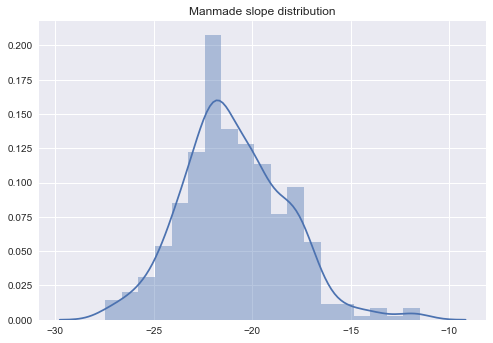

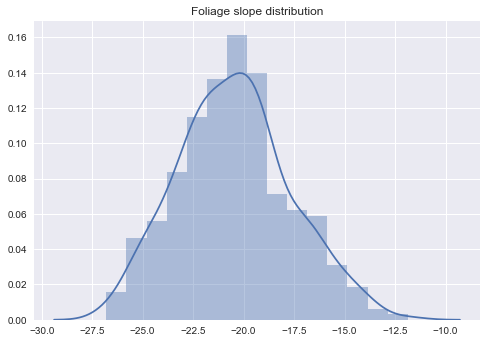

In [165]:
plt.close()
sns.distplot(manmade_slopes)
plt.title("Manmade slope distribution")
plt.show()

plt.close()
sns.distplot(foliage_slopes)
plt.title("Foliage slope distribution")
plt.show()

### It seems not easy to classify only based on slope

## classify based on slope

In [208]:
#cross-validation
X_df = pd.DataFrame(X)
Y_new = []
for i, cla in enumerate(Y):
    if cla == "Manmade":
        Y_new.append(0)
    else:
        Y_new.append(1)
Y_df = pd.DataFrame(Y_new)

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X_df, Y_df)

#Random Forest
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)

accuracy = np.mean(np.equal(Y_test[0].values.tolist(),Y_predict))

print("Accuracy: ", accuracy)

Accuracy:  0.548387096774


D:\download\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


## classify based on spectrum(1-D spectrum/ low frequency only)

In [174]:

"""
We used frequency<10^3 (low frequency)
"""
#finding index that r < 10^2.5
r_list, avg_list, ro_list, avgro_list = radialAverage(foliage_specs[0:1])

cnt = 0
print(len(r_list))
for r in r_list:
    if r<3:
        cnt +=1
print(cnt)


362
20


In [190]:
def radialAverage_limited(array, limit):
    radial_dict = defaultdict(lambda:[])
    round_radict = defaultdict(lambda:[])
    center = [256,256]
    r_list = list()
    avg_list = list()
    ro_list = list()
    avgro_list = list()
    
    
    for j, row in enumerate(array):
        for k, val in enumerate(row):
            radial = math.sqrt((center[0]-j)**2 + (center[1]-k)**2)
            radial_dict[int(radial)].append(val)
            round_radict[round(radial, 1)].append(val)
                
    sorted_radial = sorted(radial_dict.items(), key=operator.itemgetter(0))
    sorted_roundradial = sorted(round_radict.items(), key=operator.itemgetter(0))
    
    #spectrum(int)
    for k,i in enumerate(sorted_radial[0:limit]):
        if k==0:
            pass
        else:
            r_list.append(math.log(i[0]))
            avg_list.append(sum(i[1])/len(i[1]))
    #spectrum(round 1)
    for k,i in enumerate(sorted_roundradial[0:limit]):
        if k==0:
            pass
        else:
            ro_list.append(math.log(i[0]))
            avgro_list.append(sum(i[1])/len(i[1]))

    return r_list, avg_list, ro_list, avgro_list

In [194]:
#now we use 19 features( except DC )

X2 = []

for i, spec in enumerate(foliage_specs):
    r_list, avg_list, ro_list, avgro_list = radialAverage_limited(spec, 20)
    X2.append([])
    for avg in avg_list[0:20]:
        X2[i].append(avg)
print("Done")
new_index = len(X2)

for i, spec in enumerate(manmade_specs):
    r_list, avg_list, ro_list, avgro_list = radialAverage_limited(spec, 20)
    X2.append([])
    for avg in avg_list[0:20]:
        X2[i+new_index].append(avg)

Done


In [221]:
#cross-validationd
X_df = pd.DataFrame(X2)
Y_new = []
for i, cla in enumerate(Y):
    if cla == "Manmade":
        Y_new.append(0)
    else:
        Y_new.append(1)
Y_df = pd.DataFrame(Y_new)

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X_df, Y_df)

#Random Forest
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)

accuracy = np.mean(np.equal(Y_test[0].values.tolist(),Y_predict))

print("Accuracy: ", accuracy)

Accuracy:  0.623655913978


D:\download\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


### We tried both(based on slope/1D spectrum(low frequency only) many times.
### accuracy of classification based on slope : about 50.00~ 57.00
### accuracy of classification based on 1D spectrum : about 60.00~ 65.00 -> It works little bit better